In [ ]:
!pip install geopandas

     |████████████████████████████████| 994 kB 5.0 MB/s 
     |████████████████████████████████| 6.3 MB 34.2 MB/s 
     |████████████████████████████████| 15.4 MB 39 kB/s 


In [ ]:
!pip install folium

In [ ]:
import numpy as np
import pandas as pd
import geopandas as gpd
import folium
import matplotlib.pyplot as plt

In [ ]:
!git clone https://github.com/CityScope/CSL_HCMC/

Cloning into 'CSL_HCMC'...
remote: Enumerating objects: 1930, done.
remote: Counting objects: 100% (590/590), done.
remote: Compressing objects: 100% (314/314), done.
remote: Total 1930 (delta 309), reused 500 (delta 270), pack-reused 1340
Receiving objects: 100% (1930/1930), 178.53 MiB | 23.88 MiB/s, done.
Resolving deltas: 100% (986/986), done.
Checking out files: 100% (542/542), done.


In [ ]:
data = gpd.read_file('/content/CSL_HCMC/Data/GIS/Population/population_HCMC/population_shapefile/Population_District_Level.shp')

In [ ]:
data.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((684948.318 1193882.223, 684971.256 1..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((684382.122 1193521.050, 684410.753 1..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((687625.438 1189132.516, 687615.280 1..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((679534.413 1187518.498, 679077.904 1..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((691506.715 1190058.151, 691359.893 1..."


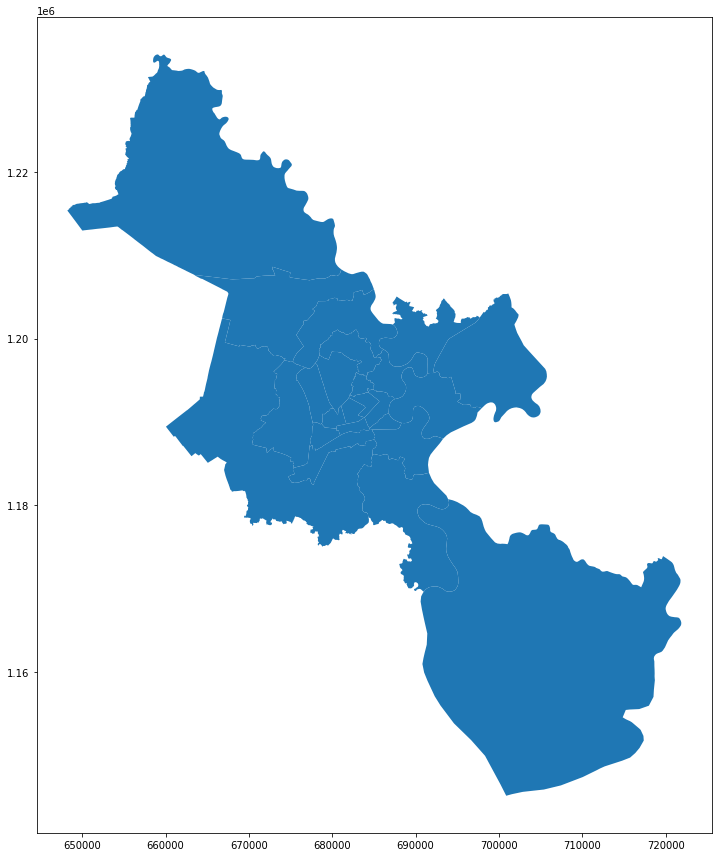

In [ ]:
data.plot(figsize=(15, 15))
plt.show()

In [ ]:
data.crs

<Projected CRS: EPSG:32648>
Name: WGS 84 / UTM zone 48N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 102°E and 108°E, northern hemisphere between equator and 84°N, onshore and offshore. Cambodia. China. Indonesia. Laos. Malaysia - West Malaysia. Mongolia. Russian Federation. Singapore. Thailand. Vietnam.
- bounds: (102.0, 0.0, 108.0, 84.0)
Coordinate Operation:
- name: UTM zone 48N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Use WGS 84 (epsg:4326) as the geographic coordinate system
data = data.to_crs(epsg=4326)
print(data.crs)
data.head()

epsg:4326


,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795..."
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792..."
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752..."
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735..."
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758..."


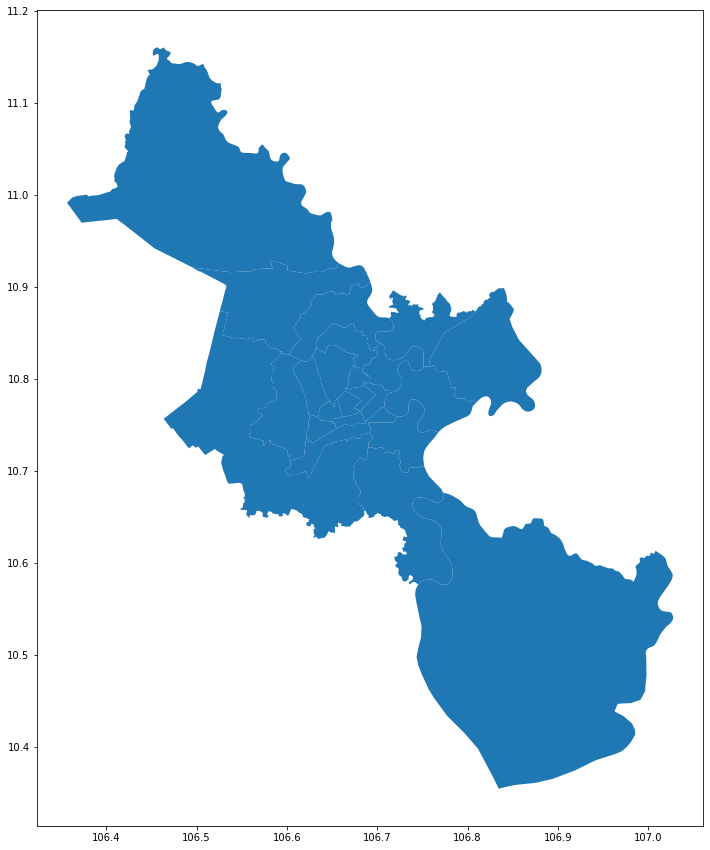

In [ ]:
data.plot(figsize=(15, 15))
plt.show()

In [ ]:
m = folium.Map(location=[10.8, 106.7], zoom_start=10, tiles='CartoDB positron')
m

In [ ]:
for _, r in data.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j, style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Dist_Name']).add_to(geo_j)
    geo_j.add_to(m)
m

In [ ]:
# Project to NAD83 projected crs
data = data.to_crs(epsg=2263)

# Access the centroid attribute of each polygon
data['centroid'] = data.centroid

In [ ]:
# Project to WGS84 geographic crs

# geometry (active) column
data = data.to_crs(epsg=4326)

# Centroid column
data['centroid'] = data['centroid'].to_crs(epsg=4326)

data.head()

,Dist_Name,Dist_ID,Level,Pop_2009,Pop_2010,Pop_2011,Pop_2012,Pop_2013,Pop_2014,Pop_2015,Pop_2016,Pop_2017,Pop_2019,Den_2009,Den_2010,Den_2011,Den_2012,Den_2013,Den_2014,Den_2015,Den_2016,Den_2017,Den_2019,Shape_Leng,Shape_Area,geometry,centroid
0,District 1,760,District,180225.0,187435.0,187419.0,190943.0,197421.0,200297.0,193632.0,208475.0,211220.0,142625.0,23360.40,24294.90,24292.90,24749.60,25589.30,25962.10,25098.20,27022.1,27377.90,18486.8,15274.835115,7.714899e+06,"POLYGON ((106.69160 10.79553, 106.69181 10.795...",POINT (106.69713 10.77622)
1,District 3,770,District,190553.0,188945.0,190631.0,191580.0,193206.0,193694.0,196333.0,198104.0,199095.0,190375.0,38688.60,38362.10,38704.40,38897.10,39227.20,39326.30,39862.10,40221.7,40422.90,38652.5,12182.058264,4.925215e+06,"POLYGON ((106.68641 10.79229, 106.68667 10.792...",POINT (106.68283 10.78144)
2,District 4,773,District,180980.0,183261.0,184711.0,185649.0,185808.0,187157.0,186727.0,186995.0,183894.0,175329.0,43311.10,43857.00,44204.00,44428.40,44466.50,44789.30,44686.40,44750.6,44008.40,41958.7,9483.716891,4.178668e+06,"POLYGON ((106.71584 10.75245, 106.71574 10.752...",POINT (106.70549 10.75845)
3,District 6,775,District,249329.0,253474.0,254212.0,257865.0,266121.0,257183.0,258945.0,260742.0,262757.0,233561.0,34910.50,35490.80,35594.20,36105.70,37261.60,36010.20,36256.90,36508.5,36790.60,32702.7,13077.365262,7.140945e+06,"POLYGON ((106.64179 10.73826, 106.63760 10.735...",POINT (106.63519 10.74585)
4,District 7,778,District,244276.0,274828.0,268483.0,266633.0,280743.0,296757.0,310178.0,317488.0,327223.0,360155.0,6929.39,7796.06,7616.07,7563.59,7963.85,8418.12,8798.84,9006.2,9282.35,10216.5,33260.915360,3.525220e+07,"POLYGON ((106.75137 10.76062, 106.75001 10.758...",POINT (106.72941 10.73640)


In [ ]:
for _, r in data.iterrows():
    lat = r['centroid'].y
    lon = r['centroid'].x
    folium.Marker(location=[lat, lon],
                  popup='length: {} <br> area: {}'.format(r['Shape_Leng'], r['Shape_Area'])).add_to(m)

m